/home/bryan/anaconda3/envs/pytorch-from-scratch/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:227: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
/home/bryan/anaconda3/envs/pytorch-from-scratch/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:243: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https:/

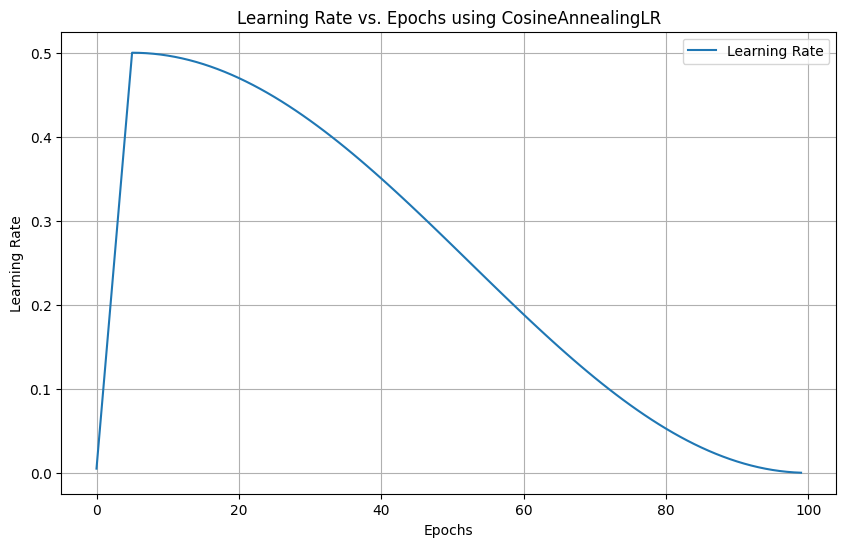

In [30]:
import torch
import matplotlib.pyplot as plt

# Define the number of epochs
lr_warmup_epochs = 5
num_epochs = 100

# Create a dummy optimizer
optimizer = torch.optim.SGD([torch.zeros(1)], lr=0.5, momentum=0.9)


scheduler1 = torch.optim.lr_scheduler.LinearLR(
    optimizer,
    start_factor=0.01,
    total_iters=lr_warmup_epochs,
)
# Create the CosineAnnealingLR scheduler
scheduler2 = torch.optim.lr_scheduler.CosineAnnealingLR(
    optimizer,
    T_max=num_epochs - lr_warmup_epochs,
    eta_min = 0.0
)
scheduler = torch.optim.lr_scheduler.SequentialLR(
    optimizer, [scheduler1, scheduler2], milestones=[lr_warmup_epochs]
)

# Store the learning rates for each epoch
learning_rates = []

for epoch in range(num_epochs):
    # Step the scheduler
    # Get the current learning rate
#     current_lr = optimizer.param_groups[0]['lr']
    current_lr = scheduler.get_last_lr()[0]
    learning_rates.append(current_lr)
    scheduler.step()

# Plot the learning rates
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), learning_rates, label='Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Learning Rate')
plt.title('Learning Rate vs. Epochs using CosineAnnealingLR')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
learning_rates

[0.005,
 0.2525,
 0.5,
 0.4809698831278217,
 0.42677669529663687,
 0.34567085809127246,
 0.25,
 0.15432914190872757,
 0.07322330470336313,
 0.01903011687217832]